In [39]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import numpy as np
from IPython.display import display
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_validate, train_test_split
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets, metrics, model_selection, svm



In [47]:
IMG_DIR="../paper/images/"


In [3]:
import os

In [4]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'app_models.py',
 'CMPE 255 Credit Risk Prediction-Main.ipynb',
 'CMPE 255 Credit Risk Prediction-Main.py',
 'preprocessing.py',
 'previous code',
 'properties.py',
 'requirements.txt',
 'Testing.xlsx',
 'Untitled.ipynb',
 'util.py',
 '__pycache__']

In [5]:
df_in=pd.read_excel('Testing.xlsx')

In [36]:
result_dict={}

C:\Users\user1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

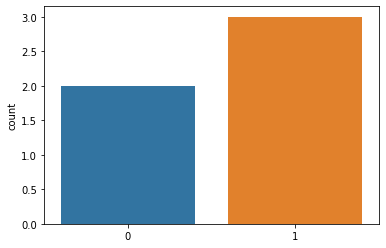

In [60]:
import seaborn as sns


[INFO] Applying One hot encoding
[INFO] One hot encoding completed
[INFO] Before Upsampling


C:\Users\user1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


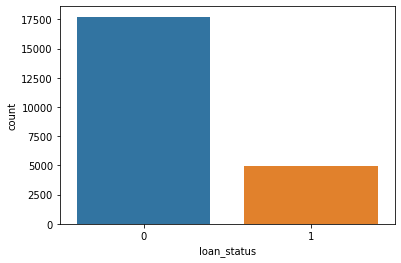

[INFO] After Upsampling


C:\Users\user1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


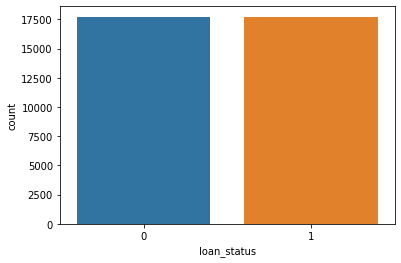

C:\Users\user1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[INFO] Upsampling Completed
[14:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[INFO] Model name: XGBClassifier
[INFO] Results on Train:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     17722
           1       1.00      0.94      0.97     17722

    accuracy                           0.97     35444
   macro avg       0.97      0.97      0.97     35444
weighted avg       0.97      0.97      0.97     35444

####################################################################################################

[INFO] Evaluation Metrics on Train:

	Accuracy: 0.9701500959259677
	Precision Score: 0.996721116012877
	Recall Score: 0.9434036790429974
	F1 Score: 0.9693297773654916


#####

C:\Users\user1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


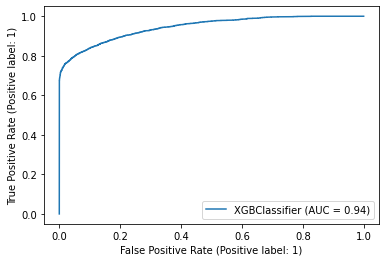

####################################################################################################


In [64]:
target_column="loan_status"
CATEGORICAL_COLUMNS=["person_home_ownership","loan_intent","loan_grade","cb_person_default_on_file"]
NUMERICAL_COLUMNS=['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income']
result_dict=apply_XGBoost(df_in,target_column,CATEGORICAL_COLUMNS,NUMERICAL_COLUMNS,result_dict)

In [63]:
def create_train_test_split(df_in,target_column):
    """
    
    Author : Mareedu Mahesh Chandra

    This funtion creates train test split on the data
    
    Params:
    -----------------
    
    df_in
    => Input dataset
    
    
    target_column
    =>A target column used to create split on data,for separating features and target varibles.
    

    
    Returns:
    -----------------
    Train test splits
    
    """
    

    
    X_train, X_test, y_train, y_test = train_test_split(df_in.loc[:, df_in.columns !=target_column ],
                                                    df_in[target_column],stratify=df_in[target_column], 
                                                    test_size = 0.30, random_state = 100)
    return X_train, X_test, y_train, y_test
    
def upsample(X_in,y_in):
    
    """
    
    Author : Mareedu Mahesh Chandra

    This funtion upsamples minorty class records and balances with majority class records.
    
    Params:
    -----------------
    
    X_in,y_in
    => features,corresponding target variables
    

    
    Returns:
    -----------------
    Balanced X_train and y_train
    
    """
    
    
    print("[INFO] Before Upsampling")
    sns.countplot(y_in)
    graph_file=IMG_DIR+'before_upsampling.png'
    plt.savefig(graph_file)
    plt.show()
    
    print("[INFO] After Upsampling")
    oversample = SMOTE()
    X_in_upsampled, y_in_upsampled = oversample.fit_resample(X_in, y_in)
    graph_file=IMG_DIR+'after_upsampling.png'
    sns.countplot(y_in_upsampled)
    plt.show()
    print("[INFO] Upsampling Completed")
    
    return X_in_upsampled, y_in_upsampled

In [38]:
result_dict

{'XGBClassifier': [0.9323184529932113,
  0.9390316796174537,
  0.7385989656793606,
  0.8268421052631578]}

In [52]:
def show_results(X_tr,Y_tr,X_tst,y_tst,classifier,result_dict):
    
    """
    
    Author : Mareedu Mahesh Chandra

    This funtion plots confusion matrix and provides classification report.
    
    Params:
    -----------------
    
    X_tr,Y_tr,X_tst,y_tst
    => Train and Test sets
    
    
    classifier
    =>An ML classifier used for prediction.
    

    -----------------
    

    """
    model_name = type(classifier).__name__
    print("[INFO] Model name:",model_name)
    print("[INFO] Results on Train:\n")
    
    
    ### Evaluating Train Results
    y_tr_prd = classifier.predict(X_tr)
    print(classification_report(Y_tr, y_tr_prd))
    
    print("#"*100)
    print("\n[INFO] Evaluation Metrics on Train:\n")
    print("\tAccuracy:",accuracy_score(Y_tr, y_tr_prd))
    print("\tPrecision Score:",precision_score(Y_tr, y_tr_prd))
    print("\tRecall Score:",recall_score(Y_tr, y_tr_prd))
    print("\tF1 Score:",f1_score(Y_tr, y_tr_prd))
    print("\n")
    
    #plot_confusion_matrix(classifier, X_tr, Y_tr)
    plt.show()
    
    print("#"*100)
    
    
    ### Evaluating Train Results
    print("[INFO] Results on Test:\n")
    y_tst_pred = classifier.predict(X_tst)
    print(classification_report(y_tst, y_tst_pred))
    
    print("\n[INFO] Evaluation Metrics on Test:\n")

    test_accuracy=accuracy_score(y_tst, y_tst_pred)
    test_precision=precision_score(y_tst, y_tst_pred)
    test_recall=recall_score(y_tst, y_tst_pred)
    test_f1_score=f1_score(y_tst, y_tst_pred)
    
    result_dict[model_name]=[test_accuracy,test_precision,test_recall,test_f1_score]
    
    

    print("\tAccuracy:",test_accuracy)
    print("\tPrecision Score:",test_precision)
    print("\tRecall Score:",test_recall)
    print("\tF1 Score:",test_f1_score)
    print("\n")
    
    ### Plotting ROC-AUC Curve
    
    metrics.plot_roc_curve(classifier, X_tst, y_tst) 
    graph_file=IMG_DIR+model_name+'_roc_auc_plot.png'
    plt.savefig(graph_file)
    plt.show()
    

    print("#"*100)
    
    #plot_confusion_matrix(classifier, X_tst, y_tst) 
    plt.show()
    
    return result_dict

    
    

In [9]:
def apply_one_hot_encoding(df_in,CATEGORICAL_COLUMNS,NUMERICAL_COLUMNS):
    
    """
    
    Author : Mareedu Mahesh Chandra

    This funtion applies one hot encoding on categorical features of the dataset.
    
    Params:
    -----------------
    
    df_in
    => Input dataframe
    
    CATEGORICAL_COLUMNS
    => List of categorical columns
    
    NUMERICAL_COLUMNS
    => List of numerical columns
    

    
    Returns:
    -----------------
    dataframe with encoded values.
    
    """
    
    
    print("[INFO] Applying One hot encoding")
    ohe = OneHotEncoder(categories='auto')
    feature_arr = ohe.fit_transform(df_in[CATEGORICAL_COLUMNS]).toarray()
    feature_labels = ohe.categories_
    df_encoded=pd.DataFrame(data=feature_arr,columns=ohe.get_feature_names_out())
    df_final=df_in[NUMERICAL_COLUMNS].join(df_encoded)
    df_final['loan_status']=df_in['loan_status']
    
    print("[INFO] One hot encoding completed")
    
    
    return df_final
    
    
 

In [33]:
def apply_XGBoost(df_in,target_column,CATEGORICAL_COLUMNS,NUMERICAL_COLUMNS,result_dict):
    
    """
    
    Author : Mareedu Mahesh Chandra

    This funtion performs:
        
        1.One hot encoding
        2.Train test split
        3.Upsampling
        4.Training XGBoost
        5.Testing model
        
    Params:
    -----------------
    
    df_in
    => Input dataframe
    
    target_column
    =>target column in the dataset
    
    CATEGORICAL_COLUMNS
    => List of categorical columns
    
    NUMERICAL_COLUMNS
    => List of numerical columns
    
    result_dict
    =>To track results of each model
    
    
    """
    
    
    ### Applying One hot encoding
    df_in=apply_one_hot_encoding(df_in,CATEGORICAL_COLUMNS,NUMERICAL_COLUMNS)
    
    ### Creatig Train test splits
    X_train, X_test, y_train, y_test=create_train_test_split(df_in,target_column)
    
    
    ### Upsamplign the data
    X_train_upsampled,y_train_upsampled=upsample(X_train,y_train)
    
    
    ### Applying XGBoost
    xgb_clf = xgb.XGBClassifier()
    xgb_clf.fit(X_train_upsampled , y_train_upsampled)
    
    result_dict=show_results(X_train_upsampled,y_train_upsampled,X_test,y_test,xgb_clf,result_dict)
    
    return result_dict
    
 

In [11]:
def apply_RFC(df_in,target_column,CATEGORICAL_COLUMNS,NUMERICAL_COLUMNS):
    
    """
    Author: Nikhil Kumar Kanisetty

    This function performs:
    - Splitting train and test
    - Upsample the data since the data is imbalanced
    - Train a Random Forest Classifier
    - Predict using the above model

    params:
    df -> input_df
    target -> target_column
    CATEGORICAL_COLUMNS -> all the categorical columns in the data
    NUMERICAL_COLUMNS -> all the numereical columns in the data
    """
    df_in = apply_one_hot_encoding(df_in, CATEGORICAL_COLUMNS, NUMERICAL_COLUMNS)

    X_train, X_test, y_train, y_test = create_train_test_split(df_in, target_column)

    X_train_upsampled, y_train_upsampled = upsample(X_train, y_train)
    
    print("**RANDOM FOREST CLASSIFIER with max_depth = 3**")
    rf = RandomForestClassifier(max_depth = 3, random_state = 100)
    rf.fit(X_train_upsampled, y_train_upsampled)

    show_results(X_train_upsampled, y_train_upsampled, X_test, y_test, rf)
    
#     grid_search = GridSearchCV(RandomForestClassifier(), {
#                     "n_estimators": range(100, 300, 100),
#                     "max_depth": range(2, 20, 2),
#                     "max_features": range(1, 4),
#                     'criterion': ["gini", "entropy"]
#                     }, cv = 5, n_jobs = -1, verbose = 2)
#     grid_search.fit(X_train_upsampled, y_train_upsampled)
#     print(f"Parameters after hyper parameter tuning: {grid_search.best_params_}")

#    {'criterion': 'entropy', 'max_depth': 18, 'max_features': 3, 'n_estimators': 200}
    print("**RANDOM FOREST CLASSIFIER after hyper parameter tuning using GridSearch**")
    rf = RandomForestClassifier(n_estimators = 200, max_features = 3, max_depth = 18, criterion = "entropy", random_state = 100)
    rf.fit(X_train_upsampled, y_train_upsampled)
    
    show_results(X_train_upsampled, y_train_upsampled, X_test, y_test, rf)
    
    select_features = SelectFromModel(RandomForestClassifier(n_estimators = 200, max_features = 3, max_depth = 18,
                                                             criterion = "gini", random_state = 100))
    select_features.fit(X_train_upsampled, y_train_upsampled)
    
    df = df_in.drop(columns = 'loan_status', axis = 1)
    columns = df.columns[(select_features.get_support())]
    
    print(f"Top Features: {columns}")
    print()

    X_train_upsampled = X_train_upsampled[columns]
    X_test = X_test[columns]
    
    print("**RANDOM FOREST CLASSIFIER with only top features**")    
    rf.fit(X_train_upsampled, y_train_upsampled)
    
    show_results(X_train_upsampled, y_train_upsampled, X_test, y_test, rf)
 

In [12]:
   

def apply_dt(df_in,target_column,CATEGORICAL_COLUMNS,NUMERICAL_COLUMNS):
    
    """
    
    Author : Lokesh Vaddi

    This funtion performs:
        
        1.One hot encoding
        2.Train test split
        3.Upsampling
        4.Training Decision Tree Classifier
        5.Testing model
        
    Params:
    -----------------
    
    df_in
    => Input dataframe
    
    target_column
    =>target column in the dataset
    
    CATEGORICAL_COLUMNS
    => List of categorical columns
    
    NUMERICAL_COLUMNS
    => List of numerical columns
    
    
    """
    ### Applying One hot encoding
    df_in = apply_one_hot_encoding(df_in, CATEGORICAL_COLUMNS, NUMERICAL_COLUMNS)
    
    ### Creating Train test splits
    X_train, X_test, y_train, y_test = create_train_test_split(df_in, target_column)
    
    ### Upsampling the Data
    X_train_upsampled, y_train_upsampled = upsample(X_train, y_train)
    
    ### Applying Decision Tree Classifier
    credit_tree = DecisionTreeClassifier(criterion='entropy')
    credit_tree.fit(X_train_upsampled, y_train_upsampled)
    
    ### Results
    show_results(X_train_upsampled, y_train_upsampled, X_test, y_test, credit_tree)


    